In [1]:
%load_ext autoreload

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

from JPAS_DA.data import loading_tools

import numpy as np

from JPAS_DA.utils import plotting_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')
font, rcnew = plotting_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%matplotlib widget

In [2]:
root_path = "/home/dlopez/Documents/Projects/JPAS_Domain_Adaptation/DATA/noise_jpas_v1/Train-Validate-Test"

load_JPAS_data = [{
    "name": "all",
    "npy": "JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy",
    "csv": "JPAS_DATA_PROPERTIES.csv",
    "sample_percentage": 1.0  # Optional, defaults to 1.0
}]

load_DESI_data = [
{
    "name": "train",
    "npy": "mock_3_train.npy",
    "csv": "props_training.csv",
    "sample_percentage": 0.3
},
{
    "name": "val",
    "npy": "mock_3_validate.npy",
    "csv": "props_validate.csv",
    "sample_percentage": 1.0
},
{
    "name": "test",
    "npy": "mock_3_test.npy",
    "csv": "props_test.csv",
    "sample_percentage": 1.0
}
]

random_seed_load = 42

In [3]:
JPAS = {}
JPAS = loading_tools.load_JPAS_dsets(JPAS, root_path, load_JPAS_data)

2025-05-16 12:45:34,598 - INFO - ├─── 📥 Starting JPAS dataset loading...
2025-05-16 12:45:34,599 - INFO - |    ├─── 🔹 Dataset: all (sample 100%)
2025-05-16 12:45:34,644 - INFO - |    |    ✔ CSV loaded: JPAS_DATA_PROPERTIES.csv (shape: (52020, 18))
2025-05-16 12:45:34,656 - INFO - |    |    ✔ NPY loaded: JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy (obs shape: (52020, 57))
2025-05-16 12:45:34,656 - INFO - ├─── ✅ Finished loading all JPAS datasets.


In [4]:
print(JPAS.keys())
print(JPAS['all_observations'].shape)
print(JPAS['all_errors'].shape)
print(JPAS['all_pd'].keys())

dict_keys(['all_pd', 'all_observations', 'all_errors'])
(52020, 57)
(52020, 57)
dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE'])


In [5]:
for ii, key in enumerate(JPAS['all_pd'].keys()):
    print(key)
    print("    ", type(JPAS['all_pd'][key]))
    print("    ", len(JPAS['all_pd'][key]))

SURVEY
     <class 'list'>
     52020
PROGRAM
     <class 'list'>
     52020
HEALPIX
     <class 'numpy.ndarray'>
     52020
TARGETID
     <class 'numpy.ndarray'>
     52020
RA
     <class 'numpy.ndarray'>
     52020
DEC
     <class 'numpy.ndarray'>
     52020
DESI_FLUX_G
     <class 'numpy.ndarray'>
     52020
DESI_FLUX_R
     <class 'numpy.ndarray'>
     52020
DESI_FLUX_Z
     <class 'numpy.ndarray'>
     52020
EBV
     <class 'numpy.ndarray'>
     52020
MORPHTYPE
     <class 'list'>
     52020
SPECTYPE
     <class 'list'>
     52020
REDSHIFT
     <class 'numpy.ndarray'>
     52020
ISINJPAS
     <class 'numpy.ndarray'>
     52020
TILE_ID
     <class 'numpy.ndarray'>
     52020
NUMBER
     <class 'numpy.ndarray'>
     52020
NOISE_SEED
     <class 'list'>
     52020
NOISE_TILE
     <class 'numpy.ndarray'>
     52020


In [6]:
DESI_split = {}
DESI_split = loading_tools.load_DESI_dsets(DESI_split, root_path, load_DESI_data, random_seed=random_seed_load)

2025-05-16 12:45:34,670 - INFO - ├─── 📥 Starting DESI dataset loading...
2025-05-16 12:45:34,670 - INFO - |    ├─── 🔹 Dataset: train
2025-05-16 12:45:35,622 - INFO - |    |    ✔ CSV loaded ((1087882, 18)), Size: 445.74 MB
2025-05-16 12:45:35,623 - INFO - |    |    ✔ NPY loaded ((1087882, 57, 3)), Size: 1488.22 MB
2025-05-16 12:45:35,630 - INFO - |    |    📉 Sampling 326364/1087882 rows (30%)
2025-05-16 12:45:36,805 - INFO - |    |    ✔ Sample loaded. Final shape: (326364, 57, 3)
2025-05-16 12:45:36,806 - INFO - |    ├─── 🔹 Dataset: val
2025-05-16 12:45:37,017 - INFO - |    |    ✔ CSV loaded ((233118, 18)), Size: 95.51 MB
2025-05-16 12:45:37,030 - INFO - |    |    ✔ NPY loaded ((233118, 57, 3)), Size: 318.91 MB
2025-05-16 12:45:37,339 - INFO - |    |    ✔ Sample loaded. Final shape: (233118, 57, 3)
2025-05-16 12:45:37,340 - INFO - |    ├─── 🔹 Dataset: test
2025-05-16 12:45:37,536 - INFO - |    |    ✔ CSV loaded ((233118, 18)), Size: 95.52 MB
2025-05-16 12:45:37,540 - INFO - |    |    ✔ 

In [7]:
print(DESI_split.keys())

for key in ["train", "val", "test"]:
    print(key)

    key_np = f"{key}_np"
    print("    ", type(DESI_split[key_np]))    
    print("    ", DESI_split[key_np].shape)

    key_pd = f"{key}_pd"
    for ii, key_ in enumerate(DESI_split[key_pd].keys()):
        print("        ", key_)
        print("            ", type(DESI_split[key_pd][key_]))
        print("            ", len(DESI_split[key_pd][key_]))

dict_keys(['train_pd', 'train_np', 'val_pd', 'val_np', 'test_pd', 'test_np'])
train
     <class 'numpy.ndarray'>
     (326364, 57, 3)
         SURVEY
             <class 'list'>
             326364
         PROGRAM
             <class 'list'>
             326364
         HEALPIX
             <class 'numpy.ndarray'>
             326364
         TARGETID
             <class 'numpy.ndarray'>
             326364
         RA
             <class 'numpy.ndarray'>
             326364
         DEC
             <class 'numpy.ndarray'>
             326364
         DESI_FLUX_G
             <class 'numpy.ndarray'>
             326364
         DESI_FLUX_R
             <class 'numpy.ndarray'>
             326364
         DESI_FLUX_Z
             <class 'numpy.ndarray'>
             326364
         EBV
             <class 'numpy.ndarray'>
             326364
         MORPHTYPE
             <class 'list'>
             326364
         SPECTYPE
             <class 'list'>
             326364
         RED

In [8]:
DESI = loading_tools.concatenate_DESI_splits(DESI_split, merged_pd_key="DESI_pd", merged_np_key="DESI_np")

2025-05-16 12:45:37,842 - INFO - ├─── 🔄 Concatenating DESI dataset splits...
2025-05-16 12:45:37,842 - INFO - |    |    Identified split names: ['train', 'val', 'test']
2025-05-16 12:45:38,001 - INFO - |    |    Merged NPY arrays into 'DESI_np' with shape (792600, 57, 3)
2025-05-16 12:45:38,001 - INFO - ├─── ✅ DESI split concatenation complete.


In [9]:
print(DESI.keys())
print(DESI['DESI_np'].shape)
print(DESI['DESI_pd'].keys())

dict_keys(['DESI_pd', 'DESI_np'])
(792600, 57, 3)
dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE'])


In [10]:
for ii, key in enumerate(DESI['DESI_pd'].keys()):
    print(key)
    print("    ", type(DESI['DESI_pd'][key]))
    print("    ", len(DESI['DESI_pd'][key]))

SURVEY
     <class 'list'>
     792600
PROGRAM
     <class 'list'>
     792600
HEALPIX
     <class 'numpy.ndarray'>
     792600
TARGETID
     <class 'numpy.ndarray'>
     792600
RA
     <class 'numpy.ndarray'>
     792600
DEC
     <class 'numpy.ndarray'>
     792600
DESI_FLUX_G
     <class 'numpy.ndarray'>
     792600
DESI_FLUX_R
     <class 'numpy.ndarray'>
     792600
DESI_FLUX_Z
     <class 'numpy.ndarray'>
     792600
EBV
     <class 'numpy.ndarray'>
     792600
MORPHTYPE
     <class 'list'>
     792600
SPECTYPE
     <class 'list'>
     792600
REDSHIFT
     <class 'numpy.ndarray'>
     792600
ISINJPAS
     <class 'numpy.ndarray'>
     792600
TILE_ID
     <class 'numpy.ndarray'>
     792600
NUMBER
     <class 'numpy.ndarray'>
     792600
NOISE_SEED
     <class 'list'>
     792600
NOISE_TILE
     <class 'numpy.ndarray'>
     792600


In [11]:
DATA = loading_tools.load_dsets(root_path=root_path, datasets_jpas=load_JPAS_data, datasets_desi=load_DESI_data, random_seed=random_seed_load)

2025-05-16 12:45:38,014 - INFO - 📥 Starting full dataset loading with `load_dsets()`
2025-05-16 12:45:38,015 - INFO - ├ Loading JPAS datasets...
2025-05-16 12:45:38,015 - INFO - ├─── 📥 Starting JPAS dataset loading...
2025-05-16 12:45:38,015 - INFO - |    ├─── 🔹 Dataset: all (sample 100%)
2025-05-16 12:45:38,058 - INFO - |    |    ✔ CSV loaded: JPAS_DATA_PROPERTIES.csv (shape: (52020, 18))
2025-05-16 12:45:38,070 - INFO - |    |    ✔ NPY loaded: JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy (obs shape: (52020, 57))
2025-05-16 12:45:38,070 - INFO - ├─── ✅ Finished loading all JPAS datasets.
2025-05-16 12:45:38,070 - INFO - ├ Loading DESI datasets (splitted)...
2025-05-16 12:45:38,071 - INFO - ├─── 📥 Starting DESI dataset loading...
2025-05-16 12:45:38,071 - INFO - |    ├─── 🔹 Dataset: train
2025-05-16 12:45:38,999 - INFO - |    |    ✔ CSV loaded ((1087882, 18)), Size: 445.74 MB
2025-05-16 12:45:39,000 - INFO - |    |    ✔ NPY loaded ((1087882, 57, 3)), Size: 1488.22 MB
2025-05-16 12:45:39,006 - I

In [12]:
print(DATA['JPAS'].keys())
print(DATA['JPAS']["all_observations"].shape)
print(DATA['JPAS']["all_errors"].shape)
print(DATA['JPAS']["all_pd"].keys())
print(DATA['JPAS']["all_pd"]['TARGETID'].shape)
print()

print(DATA['DESI'].keys())
print(DATA['DESI']["all_np"].shape)
print(DATA['DESI']["all_pd"].keys())
print(DATA['DESI']["all_pd"]['TARGETID'].shape)

dict_keys(['all_pd', 'all_observations', 'all_errors'])
(52020, 57)
(52020, 57)
dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE'])
(52020,)

dict_keys(['all_pd', 'all_np'])
(792600, 57, 3)
dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE'])
(792600,)


ratios: [0.71249519 0.05092272 0.23658208]
class_weights: [0.16663598 2.33151985 0.50184416]
ratios: [0.70467575 0.05787409 0.23745016]
class_weights: [0.18583108 2.26268203 0.55148689]


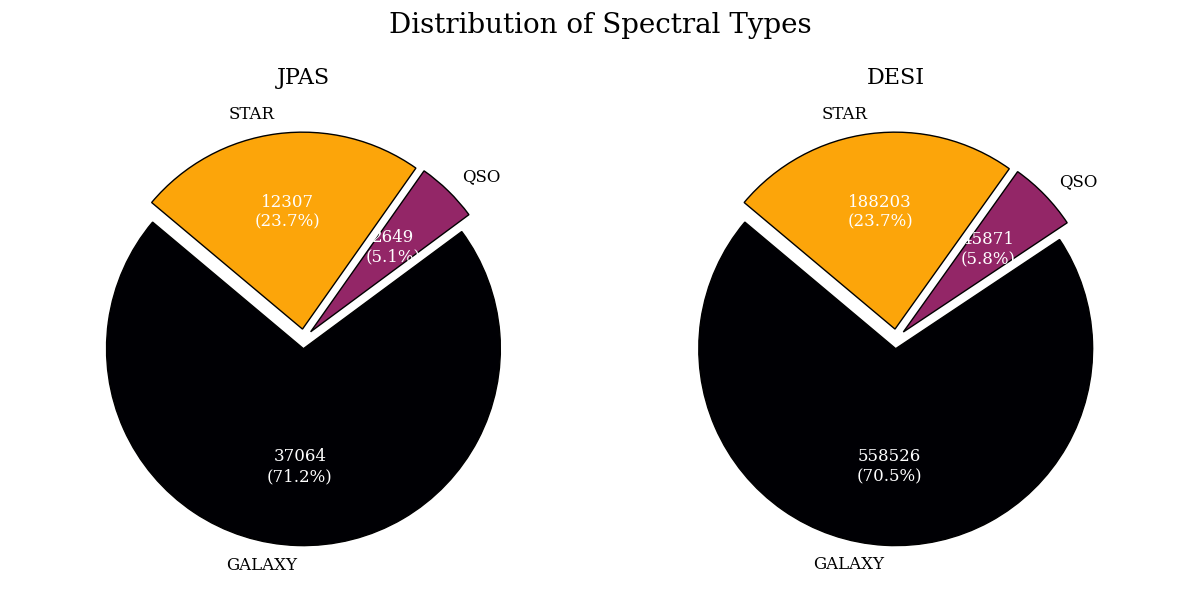

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ii, survey_key in enumerate(["JPAS", "DESI"]):

    unique_spectype_names, counts = np.unique(DATA[survey_key]["all_pd"]['SPECTYPE'], return_counts=True)

    ratios = counts / np.sum(counts)
    print("ratios:", ratios)
    inverse_ratios = 1.0 / ratios
    class_weights = inverse_ratios / inverse_ratios.mean()
    print("class_weights:", class_weights)

    ax = axs[ii]
    colors = plt.cm.inferno(np.linspace(0., 0.8, len(counts)))
    explode = [0.05] * len(counts)

    # Function to display count and percentage in two lines
    def make_autopct(counts):
        def my_autopct(pct):
            total = sum(counts)
            absolute = int(round(pct * total / 100.0))
            return f"{absolute}\n({pct:.1f}%)"
        return my_autopct

    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=unique_spectype_names,
        autopct=make_autopct(counts),
        startangle=140,
        colors=colors,
        explode=explode,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 12}
    )

    # Customize font color inside pie
    for autotext in autotexts:
        autotext.set_color("white")

    ax.set_title(f"{survey_key}", fontsize=16)

# General title
plt.suptitle("Distribution of Spectral Types", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/tmp/ipykernel_13780/3624730987.py:49: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


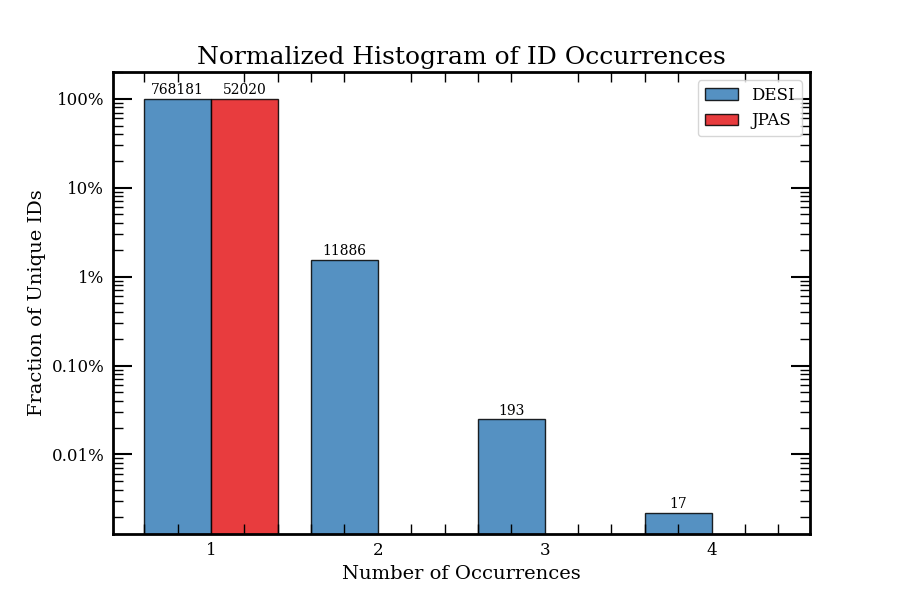

In [14]:
# === Compute DESI histogram ===
_, desi_counts = np.unique(DATA["DESI"]["all_pd"]['TARGETID'], return_counts=True)
unique_desi, count_desi = np.unique(desi_counts, return_counts=True)

# === Compute JPAS histogram ===
_, jpas_counts = np.unique(DATA["JPAS"]["all_pd"]['TARGETID'], return_counts=True)
unique_jpas, count_jpas = np.unique(jpas_counts, return_counts=True)

# === Unified occurrence axis ===
occurrences = np.union1d(unique_desi, unique_jpas)
x = np.arange(len(occurrences))

# === Align frequencies ===
aligned_desi = np.array([count_desi[unique_desi.tolist().index(v)] if v in unique_desi else 0 for v in occurrences])
aligned_jpas = np.array([count_jpas[unique_jpas.tolist().index(v)] if v in unique_jpas else 0 for v in occurrences])

# === Normalize ===
frac_desi = aligned_desi / aligned_desi.sum()
frac_jpas = aligned_jpas / aligned_jpas.sum()

# === Plot ===
fig, ax = plt.subplots(figsize=(9, 6))
bar_width = 0.4

ax.bar(x - bar_width/2, frac_desi, width=bar_width, color="#377eb8", label="DESI", edgecolor="black", alpha=0.85)
ax.bar(x + bar_width/2, frac_jpas, width=bar_width, color="#e41a1c", label="JPAS", edgecolor="black", alpha=0.85)

# === Add simple annotations ===
for i in range(len(x)):
    ax.text(x[i] - bar_width/2, frac_desi[i]*1.05, str(aligned_desi[i]), ha='center', va='bottom', fontsize=10)
    ax.text(x[i] + bar_width/2, frac_jpas[i]*1.05, str(aligned_jpas[i]), ha='center', va='bottom', fontsize=10)

# === Axis labels and style ===
ax.set_title("Normalized Histogram of ID Occurrences", fontsize=18)
ax.set_xlabel("Number of Occurrences", fontsize=14)
ax.set_ylabel("Fraction of Unique IDs", fontsize=14)
ax.set_yscale("log")
ax.set_ylim(top=2.)

ax.set_xticks(x)
ax.set_xticklabels(occurrences, fontsize=12)
ax.tick_params(axis='x', length=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: f"{y:.0%}" if y >= 0.01 else f"{y:.2%}"))
ax.tick_params(axis='y', labelsize=12)

# Clean up frame and legend
ax.legend(fontsize=12, frameon=True, loc='upper right')

plt.tight_layout()
plt.show()